# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

In [762]:
import pandas as pd
import numpy as np

In [763]:
passengers = pd.read_csv('/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/M-I-D-T-E-R-M/passengers.csv')

In [764]:
fuelconsumption = pd.read_csv('/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/M-I-D-T-E-R-M/fuel_consumption.csv')

In [765]:
fuelconsumption.isnull().sum()

month                0
airline_id           1
unique_carrier       1
carrier              0
carrier_name         1
carrier_group_new    0
sdomt_gallons        1
satl_gallons         1
spac_gallons         1
slat_gallons         2
sint_gallons         1
ts_gallons           1
tdomt_gallons        3
tint_gallons         1
total_gallons        6
sdomt_cost           0
satl_cost            1
spac_cost            1
slat_cost            1
sint_cost            1
ts_cost              0
tdomt_cost           0
tint_cost            1
total_cost           0
year                 0
dtype: int64

In [766]:
flights = pd.read_csv('/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/M-I-D-T-E-R-M/flights.csv')

In [767]:
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-27,AA,AA_CODESHARE,AA,5052,OH,N557NN,5052,11057,CLT,...,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-26,AA,AA_CODESHARE,AA,5812,YV,N952LR,5812,13851,OKC,...,175,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN
2,2018-10-25,WN,WN,WN,1270,WN,N962WN,1270,15304,TPA,...,727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-06-25,DL,DL,DL,2031,DL,N979AT,2031,10397,ATL,...,250,0.0,19.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019-11-20,B6,B6,B6,2705,B6,N547JB,2705,11618,EWR,...,1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [768]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [769]:
#weather = pd.read_csv('/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/weather.csv')

In [770]:
#weather['City'] = weather['City'].str.strip().str.lower()

In [719]:
#weather['date'] = pd.to_datetime(weather['StartTime(UTC)']).dt.date

In [721]:
#weather['EndTime(UTC)'] = pd.to_datetime(weather['EndTime(UTC)'])

In [722]:
#temp = weather.groupby(['City', 'date']).max()['EndTime(UTC)']

In [756]:
#temp.head()

In [725]:
#temp = temp.reset_index()

In [757]:
#temp.head()

In [727]:
#weather_merged = weather.merge(temp, on = ['City', 'date', 'EndTime(UTC)'], how = 'inner')

In [728]:
#weather_merged = weather_merged.drop(['City', 'StartTime(UTC)', 'EndTime(UTC)'], axis = 1)

In [751]:
#weather_merged = weather_merged.rename(columns = {'date': 'fl_date', 'origin': 'origin'})

In [752]:
#weather_merged['fl_date'] = pd.to_datetime(weather_merged['fl_date'])

In [758]:
#weather_merged

In [759]:
#flights_weather = flights.merge(weather_merged, on = ['City', 'fl_date'], how = 'left')

In [373]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [760]:
flights.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                  291
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                 1640
dep_delay                1667
taxi_out                 1738
wheels_off               1738
wheels_on                1795
taxi_in                  1795
crs_arr_time                0
arr_time                 1751
arr_delay                1990
cancelled                   0
cancellation_code       98293
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time      1973
air_time                 2017
flights                     0
distance                    0
carrier_de

In [375]:
#Dropped 33 columns
flights1 = flights.drop(['op_carrier_fl_num', 'mkt_unique_carrier', 'dep_time', 'actual_elapsed_time', 'air_time','dep_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'arr_time', 'dest', 'dest_city_name','origin', 'origin_city_name', 'branded_code_share', 'carrier_delay','weather_delay','nas_delay','security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime','longest_add_gtime','cancelled', 'cancellation_code', 'diverted', 'dup', 'flights', 'no_name'], axis = 1)

In [376]:
flights1.columns

Index(['fl_date', 'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier',
       'tail_num', 'origin_airport_id', 'dest_airport_id', 'crs_dep_time',
       'crs_arr_time', 'arr_delay', 'crs_elapsed_time', 'distance'],
      dtype='object')

In [377]:
tail_number_mode = flights1['tail_num'].mode()
tail_number_mode

0    N492HA
dtype: object

In [378]:
flights1['tail_num'] = flights1['tail_num'].fillna(str(tail_number_mode[0]))

In [379]:
flights1['arr_delay'] = flights1['arr_delay'].fillna(flights1['arr_delay'].mean())

In [380]:
flights1.isnull().sum()

fl_date               0
mkt_carrier           0
mkt_carrier_fl_num    0
op_unique_carrier     0
tail_num              0
origin_airport_id     0
dest_airport_id       0
crs_dep_time          0
crs_arr_time          0
arr_delay             0
crs_elapsed_time      0
distance              0
dtype: int64

* adding month, day of the week, day of the month

In [381]:
flights1['fl_date'] = pd.to_datetime(flights1['fl_date'], errors='coerce')
flights1['month'] = flights1['fl_date'].dt.month
flights1['day_of_week'] = flights1['fl_date'].dt.dayofweek
flights1['day_of_month'] = flights1['fl_date'].dt.day
flights1['year'] = flights1['fl_date'].dt.year

In [386]:
#flights1=flights1.drop('fl_date', axis = 1)

In [387]:
flights1

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,day_of_week,day_of_month,year
0,AA,5052,OH,N557NN,11057,11995,1634,1733,-4.0,59,83,11,2,27,2019
1,AA,5812,YV,N952LR,13851,11298,1652,1802,24.0,70,175,12,3,26,2019
2,WN,1270,WN,N962WN,15304,14730,955,1155,0.0,120,727,10,3,25,2018
3,DL,2031,DL,N979AT,10397,15624,1342,1353,31.0,71,250,6,0,25,2018
4,B6,2705,B6,N547JB,11618,11697,1646,1952,-10.0,186,1065,11,2,20,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NK,292,NK,N667NK,12889,12266,1845,2342,-9.0,177,1222,12,6,2,2018
99996,AA,1537,AA,N352PS,14492,13930,1450,1611,18.0,141,646,6,5,29,2019
99997,DL,4293,OO,N875AS,12003,14869,1759,1944,-14.0,105,463,12,0,17,2018
99998,WN,5594,WN,N8694E,14107,13232,1445,2000,-11.0,195,1444,3,0,19,2018


In [365]:
# flights2 = flights1.copy()
# flights_cat = flights2.drop(['arr_delay'], axis=1)

In [389]:
#flights_cat

* get_dummies categorical features, didnt end up using

In [303]:
#df_dum = pd.get_dummies(flights1['dest_airport_id'])

In [390]:
flights1.dtypes

mkt_carrier            object
mkt_carrier_fl_num      int64
op_unique_carrier      object
tail_num               object
origin_airport_id       int64
dest_airport_id         int64
crs_dep_time            int64
crs_arr_time            int64
arr_delay             float64
crs_elapsed_time        int64
distance                int64
month                   int64
day_of_week             int64
day_of_month            int64
year                    int64
dtype: object

In [395]:
flights1 = flights1[(flights1['arr_delay']>0)]
flights1

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,day_of_week,day_of_month,year
1,AA,5812,YV,N952LR,13851,11298,1652,1802,24.000000,70,175,12,3,26,2019
3,DL,2031,DL,N979AT,10397,15624,1342,1353,31.000000,71,250,6,0,25,2018
5,DL,1987,DL,N923DN,13303,10397,1123,1329,32.000000,126,594,11,0,26,2018
7,AA,4049,MQ,N535EA,13930,14576,1845,2130,5.575309,105,528,11,0,26,2018
10,DL,1517,DL,N3732J,14747,10721,1029,1902,85.000000,333,2496,4,3,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,AA,4991,PT,N621AE,11057,10994,1426,1532,17.000000,66,168,4,1,9,2019
99991,AA,1776,AA,N560UW,10721,14100,1730,1917,5.000000,107,280,10,4,12,2018
99992,DL,5051,9E,N298PQ,13244,12953,600,939,46.000000,159,963,5,3,31,2018
99993,WN,3964,WN,N8549Z,11259,14771,2030,2215,201.000000,225,1476,9,6,8,2019


* make the types categories

In [396]:
#flights1["mkt_unique_carrier"] = flights1["mkt_unique_carrier"].astype("category")
flights1["mkt_carrier"] = flights1["mkt_carrier"].astype("category")
flights1["op_unique_carrier"] = flights1["op_unique_carrier"].astype("category")
flights1["tail_num"] = flights1["tail_num"].astype("category")
#flights1["op_carrier_fl_num"] = flights1["op_carrier_fl_num"].astype("category")
flights1["origin_airport_id"] = flights1["origin_airport_id"].astype("category")
flights1["dest_airport_id"] = flights1["dest_airport_id"].astype("category")
flights1["mkt_carrier_fl_num"] = flights1["mkt_carrier_fl_num"].astype("category")

In [397]:
flights1.dtypes

mkt_carrier           category
mkt_carrier_fl_num    category
op_unique_carrier     category
tail_num              category
origin_airport_id     category
dest_airport_id       category
crs_dep_time             int64
crs_arr_time             int64
arr_delay              float64
crs_elapsed_time         int64
distance                 int64
month                    int64
day_of_week              int64
day_of_month             int64
year                     int64
dtype: object

* make arr_delay categorial

In [400]:
flights1['arr_delay_cat'] = flights1['arr_delay'].apply(lambda x: 1 if x > 0 else 0)

In [402]:
flights1

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_cat
1,AA,5812,YV,N952LR,13851,11298,1652,1802,24.000000,70,175,12,3,26,2019,1
3,DL,2031,DL,N979AT,10397,15624,1342,1353,31.000000,71,250,6,0,25,2018,1
5,DL,1987,DL,N923DN,13303,10397,1123,1329,32.000000,126,594,11,0,26,2018,1
7,AA,4049,MQ,N535EA,13930,14576,1845,2130,5.575309,105,528,11,0,26,2018,1
10,DL,1517,DL,N3732J,14747,10721,1029,1902,85.000000,333,2496,4,3,11,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,AA,4991,PT,N621AE,11057,10994,1426,1532,17.000000,66,168,4,1,9,2019,1
99991,AA,1776,AA,N560UW,10721,14100,1730,1917,5.000000,107,280,10,4,12,2018,1
99992,DL,5051,9E,N298PQ,13244,12953,600,939,46.000000,159,963,5,3,31,2018,1
99993,WN,3964,WN,N8549Z,11259,14771,2030,2215,201.000000,225,1476,9,6,8,2019,1


In [403]:
# ENCODE AIRPORTS AND TAILNUM
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
flights1['mkt_carrier'] = encoder.fit_transform(flights1[['mkt_carrier']])
#flights1['mkt_unique_carrier'] = encoder.fit_transform(flights1[['mkt_unique_carrier']])
flights1['mkt_carrier_fl_num'] = encoder.fit_transform(flights1[['mkt_carrier_fl_num']])
flights1['op_unique_carrier'] = encoder.fit_transform(flights1[['op_unique_carrier']])
flights1['tail_num'] = encoder.fit_transform(flights1[['tail_num']])
#flights1['op_carrier_fl_num'] = encoder.fit_transform(flights1[['op_carrier_fl_num']])
flights1['origin_airport_id'] = encoder.fit_transform(flights1[['origin_airport_id']])
flights1['dest_airport_id'] = encoder.fit_transform(flights1[['dest_airport_id']])

In [404]:
flights1

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_cat
1,0.0,5701.0,25.0,5554.0,245.0,92.0,1652,1802,24.000000,70,175,12,3,26,2019,1
3,3.0,2017.0,8.0,5792.0,20.0,357.0,1342,1353,31.000000,71,250,6,0,25,2018,1
5,3.0,1973.0,8.0,5238.0,222.0,21.0,1123,1329,32.000000,126,594,11,0,26,2018,1
7,0.0,3967.0,16.0,2503.0,249.0,296.0,1845,2130,5.575309,105,528,11,0,26,2018,1
10,3.0,1503.0,8.0,1677.0,312.0,46.0,1029,1902,85.000000,333,2496,4,3,11,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,0.0,4893.0,20.0,2931.0,72.0,66.0,1426,1532,17.000000,66,168,4,1,9,2019,1
99991,0.0,1762.0,2.0,2623.0,45.0,265.0,1730,1917,5.000000,107,280,10,4,12,2018,1
99992,3.0,4951.0,0.0,1232.0,216.0,200.0,600,939,46.000000,159,963,5,3,31,2018,1
99993,10.0,3885.0,24.0,4508.0,88.0,314.0,2030,2215,201.000000,225,1476,9,6,8,2019,1


In [405]:
flights2 = flights1.copy()
flights_cat = flights2.drop(['arr_delay'], axis=1)

In [406]:
flights_cat

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_cat
1,0.0,5701.0,25.0,5554.0,245.0,92.0,1652,1802,70,175,12,3,26,2019,1
3,3.0,2017.0,8.0,5792.0,20.0,357.0,1342,1353,71,250,6,0,25,2018,1
5,3.0,1973.0,8.0,5238.0,222.0,21.0,1123,1329,126,594,11,0,26,2018,1
7,0.0,3967.0,16.0,2503.0,249.0,296.0,1845,2130,105,528,11,0,26,2018,1
10,3.0,1503.0,8.0,1677.0,312.0,46.0,1029,1902,333,2496,4,3,11,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,0.0,4893.0,20.0,2931.0,72.0,66.0,1426,1532,66,168,4,1,9,2019,1
99991,0.0,1762.0,2.0,2623.0,45.0,265.0,1730,1917,107,280,10,4,12,2018,1
99992,3.0,4951.0,0.0,1232.0,216.0,200.0,600,939,159,963,5,3,31,2018,1
99993,10.0,3885.0,24.0,4508.0,88.0,314.0,2030,2215,225,1476,9,6,8,2019,1


In [409]:
flights_reg = flights1.drop(['arr_delay_cat'], axis=1)

In [410]:
flights_reg

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,day_of_week,day_of_month,year
1,0.0,5701.0,25.0,5554.0,245.0,92.0,1652,1802,24.000000,70,175,12,3,26,2019
3,3.0,2017.0,8.0,5792.0,20.0,357.0,1342,1353,31.000000,71,250,6,0,25,2018
5,3.0,1973.0,8.0,5238.0,222.0,21.0,1123,1329,32.000000,126,594,11,0,26,2018
7,0.0,3967.0,16.0,2503.0,249.0,296.0,1845,2130,5.575309,105,528,11,0,26,2018
10,3.0,1503.0,8.0,1677.0,312.0,46.0,1029,1902,85.000000,333,2496,4,3,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,0.0,4893.0,20.0,2931.0,72.0,66.0,1426,1532,17.000000,66,168,4,1,9,2019
99991,0.0,1762.0,2.0,2623.0,45.0,265.0,1730,1917,5.000000,107,280,10,4,12,2018
99992,3.0,4951.0,0.0,1232.0,216.0,200.0,600,939,46.000000,159,963,5,3,31,2018
99993,10.0,3885.0,24.0,4508.0,88.0,314.0,2030,2215,201.000000,225,1476,9,6,8,2019


<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

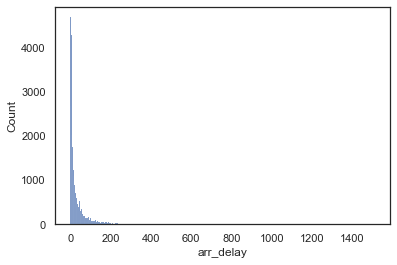

In [411]:
sns.histplot(data = flights_reg, x='arr_delay')

In [412]:
flights_reg['arr_delay_logarithm_base10'] = np.log10(flights_reg['arr_delay'])

In [413]:
flights_reg['arr_delay_logarithm_base10']

1        1.380211
3        1.491362
5        1.505150
7        0.746269
10       1.929419
           ...   
99990    1.230449
99991    0.698970
99992    1.662758
99993    2.303196
99996    1.255273
Name: arr_delay_logarithm_base10, Length: 36463, dtype: float64

In [427]:
flights_reg=flights_reg.drop(['arr_delay'], axis=1)

In [429]:
flights_reg

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_logarithm_base10
1,0.0,5701.0,25.0,5554.0,245.0,92.0,1652,1802,70,175,12,3,26,2019,1.380211
3,3.0,2017.0,8.0,5792.0,20.0,357.0,1342,1353,71,250,6,0,25,2018,1.491362
5,3.0,1973.0,8.0,5238.0,222.0,21.0,1123,1329,126,594,11,0,26,2018,1.505150
7,0.0,3967.0,16.0,2503.0,249.0,296.0,1845,2130,105,528,11,0,26,2018,0.746269
10,3.0,1503.0,8.0,1677.0,312.0,46.0,1029,1902,333,2496,4,3,11,2019,1.929419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,0.0,4893.0,20.0,2931.0,72.0,66.0,1426,1532,66,168,4,1,9,2019,1.230449
99991,0.0,1762.0,2.0,2623.0,45.0,265.0,1730,1917,107,280,10,4,12,2018,0.698970
99992,3.0,4951.0,0.0,1232.0,216.0,200.0,600,939,159,963,5,3,31,2018,1.662758
99993,10.0,3885.0,24.0,4508.0,88.0,314.0,2030,2215,225,1476,9,6,8,2019,2.303196


(array([[3.6463e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.4640e+03, 4.9580e+03, 4.6820e+03, 4.6320e+03, 2.2160e+03,
         3.5670e+03, 2.6210e+03, 3.1360e+03, 3.3230e+03, 1.8640e+03],
        [3.6463e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.5620e+03, 4.3700e+03, 3.1470e+03, 4.6510e+03, 4.0820e+03,
         4.0890e+03, 3.8720e+03, 3.8280e+03, 4.0150e+03, 8.4700e+02],
        [3.6463e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.6463e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.1080e+03, 1.2485e+04, 1.5525e+04, 6.3450e+03, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.3160e+03, 9.6270

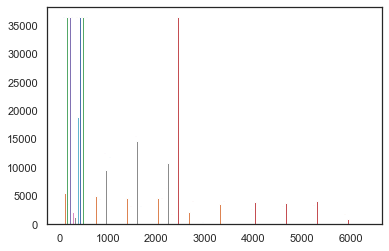

In [430]:
#sns.histplot(data = flights1, x='arr_delay_logarithm_base10')
plt.hist(flights_reg[np.isfinite(flights_reg['arr_delay_logarithm_base10'])].values)

In [434]:
flights_reg=flights_reg.rename(columns={'arr_delay_logarithm_base10':'arr_delay_new'})

In [435]:
flights_reg

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_new
1,0.0,5701.0,25.0,5554.0,245.0,92.0,1652,1802,70,175,12,3,26,2019,1.380211
3,3.0,2017.0,8.0,5792.0,20.0,357.0,1342,1353,71,250,6,0,25,2018,1.491362
5,3.0,1973.0,8.0,5238.0,222.0,21.0,1123,1329,126,594,11,0,26,2018,1.505150
7,0.0,3967.0,16.0,2503.0,249.0,296.0,1845,2130,105,528,11,0,26,2018,0.746269
10,3.0,1503.0,8.0,1677.0,312.0,46.0,1029,1902,333,2496,4,3,11,2019,1.929419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,0.0,4893.0,20.0,2931.0,72.0,66.0,1426,1532,66,168,4,1,9,2019,1.230449
99991,0.0,1762.0,2.0,2623.0,45.0,265.0,1730,1917,107,280,10,4,12,2018,0.698970
99992,3.0,4951.0,0.0,1232.0,216.0,200.0,600,939,159,963,5,3,31,2018,1.662758
99993,10.0,3885.0,24.0,4508.0,88.0,314.0,2030,2215,225,1476,9,6,8,2019,2.303196


In [684]:
flights_reg['year'].unique()

array([2019, 2018])

In [683]:
flights_reg['arr_delay_new'].describe()

count    36463.000000
mean         1.199637
std          0.588593
min          0.000000
25%          0.746269
50%          1.204120
75%          1.623249
max          3.179552
Name: arr_delay_new, dtype: float64

In [437]:
flights_reg['arr_delay_new'].mean()

1.1996367668602428

In [438]:
flights_reg['arr_delay_new'].median()

1.2041199826559248

In [771]:
flights_reg['arr_delay_new'].mode()

0    0.746269
dtype: float64

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


<AxesSubplot:>

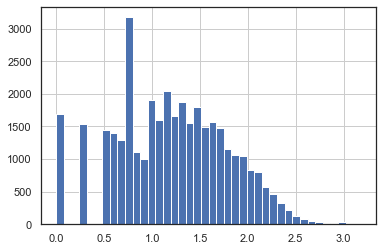

In [440]:
flights_reg['arr_delay_new'].hist(bins=40)

In [441]:
flights_reg.corr()

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_new
mkt_carrier,1.000000,-0.041392,0.600304,-0.028036,0.041239,0.026541,0.041819,0.025098,-0.017057,0.015921,-0.006863,0.006609,0.005167,-0.008581,-0.005282
mkt_carrier_fl_num,-0.041392,1.000000,0.257338,-0.042709,-0.026074,-0.041861,-0.023457,-0.006985,-0.343655,-0.374453,0.007164,0.052366,0.017549,-0.024739,0.029722
op_unique_carrier,0.600304,0.257338,1.000000,-0.008751,0.043701,0.028045,0.021469,0.006592,-0.182920,-0.160813,-0.004737,0.000094,0.012628,-0.009552,-0.027087
tail_num,-0.028036,-0.042709,-0.008751,1.000000,-0.040365,-0.035785,0.007887,-0.000596,-0.017298,-0.012537,-0.008109,-0.003402,-0.008107,-0.014627,-0.018196
origin_airport_id,0.041239,-0.026074,0.043701,-0.040365,1.000000,0.023460,-0.042443,-0.011003,0.046801,0.068720,0.002045,-0.008244,-0.006614,-0.000857,-0.006843
dest_airport_id,0.026541,-0.041861,0.028045,-0.035785,0.023460,1.000000,0.017514,0.014918,0.087633,0.077727,0.001838,0.002965,0.002587,-0.000757,-0.004859
crs_dep_time,0.041819,-0.023457,0.021469,0.007887,-0.042443,0.017514,1.000000,0.658931,-0.028651,-0.019259,0.006159,0.014415,-0.003020,0.003019,0.123727
crs_arr_time,0.025098,-0.006985,0.006592,-0.000596,-0.011003,0.014918,0.658931,1.000000,0.014570,0.009971,0.000573,0.008442,-0.005078,0.001061,0.101675
crs_elapsed_time,-0.017057,-0.343655,-0.182920,-0.017298,0.046801,0.087633,-0.028651,0.014570,1.000000,0.982455,-0.007804,0.006286,-0.003563,0.025023,0.017970
distance,0.015921,-0.374453,-0.160813,-0.012537,0.068720,0.077727,-0.019259,0.009971,0.982455,1.000000,0.002685,0.010120,-0.002833,0.016664,0.003500


<AxesSubplot:>

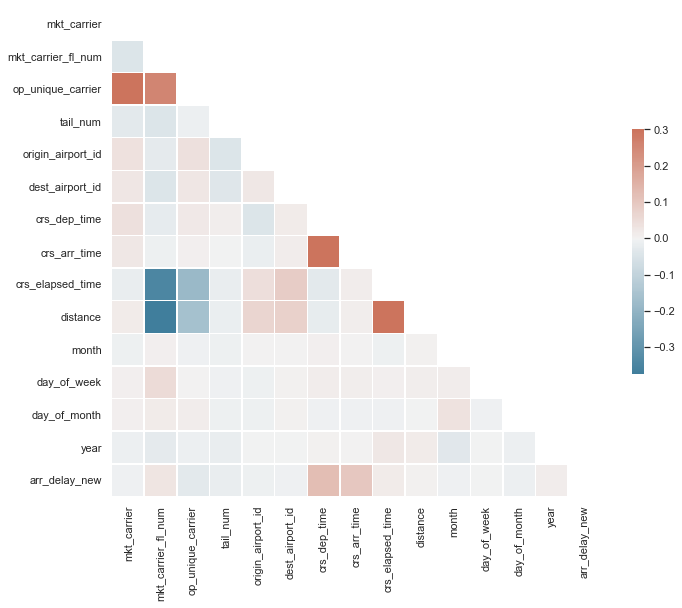

In [442]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

# Compute the correlation matrix
corr = flights_reg.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [443]:
flights_reg.columns

Index(['mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'month', 'day_of_week', 'day_of_month',
       'year', 'arr_delay_new'],
      dtype='object')

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

In [239]:
# dont need PCA if didnt do get_dummies

* PCA testing

In [257]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [258]:
pca_test = PCA(n_components=5)
principalComponents_test = pca_test.fit_transform(flights1)

In [261]:
principalComponents_test.shape

(100000, 5)

In [260]:
pca_test

PCA(n_components=5)

### Modeling

Use different ML techniques to predict each problem.

- linear
- Naive Bayes
- Random Forest Regressor
- SVM classification
- XGBoost regresspr
- The ensemble of your own choice

#### pickle module to save model

In [444]:
import pickle

* target and features

In [446]:
y = np.array(flights_reg.arr_delay_new)

In [447]:
y_cat = np.array(flights_cat.arr_delay_cat)

In [448]:
X_df = flights_reg.drop(['arr_delay_new'], axis = 1)

In [449]:
X = np.array(X_df)
X

array([[0.000e+00, 5.701e+03, 2.500e+01, ..., 3.000e+00, 2.600e+01,
        2.019e+03],
       [3.000e+00, 2.017e+03, 8.000e+00, ..., 0.000e+00, 2.500e+01,
        2.018e+03],
       [3.000e+00, 1.973e+03, 8.000e+00, ..., 0.000e+00, 2.600e+01,
        2.018e+03],
       ...,
       [3.000e+00, 4.951e+03, 0.000e+00, ..., 3.000e+00, 3.100e+01,
        2.018e+03],
       [1.000e+01, 3.885e+03, 2.400e+01, ..., 6.000e+00, 8.000e+00,
        2.019e+03],
       [0.000e+00, 1.523e+03, 2.000e+00, ..., 5.000e+00, 2.900e+01,
        2.019e+03]])

* train test split and making samples

In [450]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=101, shuffle = True)

In [462]:
#creating y_train_cat and y_test_cat
X_train, X_test, y_train_cat, y_test_cat = model_selection.train_test_split(X, y_cat, train_size=0.70,test_size=0.30, random_state=101, shuffle = True, stratify=y_cat)

In [249]:
#X_train_sample = pd.DataFrame(X_train).sample(frac = 0.50, random_state=101)

In [250]:
#y_train_sample = pd.DataFrame(y_train).sample(frac = 0.50, random_state=101)

In [465]:
#y_trainCat_sample = pd.DataFrame(y_train_cat).sample(frac = 0.50, random_state=101)

In [252]:
#X_test_sample = pd.DataFrame(X_test).sample(frac = 0.10, random_state=101)

In [253]:
#y_test_sample = pd.DataFrame(y_test).sample(frac = 0.10, random_state=101)

In [254]:
#X_testindex = X_test_sample.index

In [255]:
#X_trainindex = X_train_sample.index

* Scaling

In [256]:
'''scaler = StandardScaler()
X = scaler.fit_transform(X)'''

'scaler = StandardScaler()\nX = scaler.fit_transform(X)'

In [257]:
'''y = (y - y.mean()) / y.std()'''

'y = (y - y.mean()) / y.std()'

In [466]:
from sklearn.metrics import r2_score

* Scaling PIPE

In [467]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [468]:
pipe = Pipeline([('scaler', StandardScaler())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler())])

#### Linear

In [469]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [470]:
#logistic regression
linear_model = LinearRegression()

In [471]:
linear_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('linear_model', LinearRegression())])

In [488]:
a=linear_pipe.fit(X_train, y_train)

In [548]:
print('R2 score: {0:.2f}'.format(linear_pipe.score(X_train, y_train)))

R2 score: 0.02


In [549]:
print('R2 score: {0:.2f}'.format(linear_pipe.score(X_test, y_test)))

R2 score: 0.03


In [550]:
y_pred_linear = a.predict(X_test)

In [551]:
y_pred_linear.shape

(10939,)

In [552]:
y_test.shape

(10939,)

In [502]:
#r2_score = linear_pipe.score(y_test, y_pred_linear)

In [825]:
from sklearn.metrics import mean_squared_error

In [826]:
#np.sqrt(mean_squared_error([y_test, y_pred_linear]))

In [827]:
X.shape

(36463, 14)

In [828]:
#y=y.reshape((36463,1))

In [831]:
y=y.reshape(-1,1)

In [832]:
y.shape

(36463, 1)

ValueError: x and y must be the same size

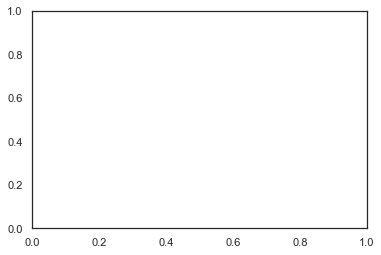

In [833]:
plt.scatter(X_train, y_train, s=10)
#plt.plot(x, y_pred, color='r')
plt.show()

In [795]:
X_test.shape

(10939, 14)

In [796]:
y_pred_linear.shape

(10939,)

In [803]:
#Polynomial Regression (2nd Order)
from sklearn.preprocessing import PolynomialFeatures

In [804]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

In [805]:
model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)

In [807]:
y_test.shape[0]

10939

In [834]:
y_test = y_test.reshape(-1,1)

In [836]:
y_poly_pred.shape[0]

25524

In [843]:
y_poly_pred = y_poly_pred.reshape(-1,1)
y_poly_pred.shape

(25524, 1)

In [844]:
rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
print(rmse)
print(r2)

ValueError: Found input variables with inconsistent numbers of samples: [10939, 25524]

In [845]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

NameError: name 'x' is not defined

#### Naives Bayes, GaussianNB Naive Bayes

In [553]:
from sklearn.naive_bayes import GaussianNB

In [554]:
NB_Gauss_model = GaussianNB()

In [555]:
NB_Gauss_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('NB_Gauss_model', GaussianNB())])

In [556]:
classifier = NB_Gauss_pipe.fit(X_train, y_train_cat)

In [560]:
#print('R2 score: {0:.2f}'.format(NB_Gauss_pipe.score(X_train, y_train_cat)))

In [561]:
#print('R2 score: {0:.2f}'.format(NB_Gauss_pipe.score(X_test, y_test_cat)))

In [517]:
y_pred_NBGauss = NB_Gauss_pipe.predict(X_test)

In [562]:
from sklearn.metrics import accuracy_score

In [563]:
accuracy_score(y_test_cat, y_pred_NBGauss)

1.0

In [564]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_cat, y_pred_NBGauss)

array([[10939]])

In [565]:
from sklearn.metrics import classification_report

In [566]:
print(classification_report(y_test_cat, y_pred_NBGauss))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     10939

    accuracy                           1.00     10939
   macro avg       1.00      1.00      1.00     10939
weighted avg       1.00      1.00      1.00     10939



In [567]:
y_test_cat.mean()

1.0

In [568]:
#from sklearn.metrics import multilabel_confusion_matrix

In [569]:
#multilabel_confusion_matrix(y_test_cat, y_pred_NBGauss)

In [570]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [571]:
y_test_cat

array([1, 1, 1, ..., 1, 1, 1])

In [572]:
import matplotlib.pyplot as plt
NB_roc_auc = roc_auc_score(y_test_cat, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test_cat, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

#### Forrest Classifier

In [583]:
from sklearn.ensemble import RandomForestClassifier

In [584]:
random_forest_class = RandomForestClassifier()

In [585]:
hyperparameters ={
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    #'min_samples_split':
    #"min_samples_split": [1, 3, 10],
    #"min_samples_leaf": [1, 3, 10],
    # "bootstrap": [True, False],
    #"criterion": ["gini", "entropy"]}

#    'rand_forrestClass__bootstrap': [False]
}

In [586]:
#Forest_class_pipe = ('rand_forrestClass', RandomForestClassifier())
forest_class_grid = GridSearchCV(estimator=random_forest_class, param_grid=hyperparameters, scoring = 'f1', verbose=0, cv= 15)

In [587]:
X_train_sample.shape

(35000, 15)

* test with sample to find best hyperparameters

In [588]:
#rand_forrestClass_grid = GridSearchCV(estimator=random_forest_class, param_grid=hyperparameters, scoring = 'r2', verbose=0, cv= 5)

In [589]:
#forest_class_grid.fit(X_train_sample, y_trainCat_sample.values.ravel())
#y_pred_randFor_class = forest_class_grid.predict(X_test_sample)

In [590]:
#forest_class_grid.best_estimator_

* adjusted to best hyperparameters

In [658]:
forest_class_grid.fit(X_train, y_train_cat)

GridSearchCV(cv=15, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5], 'n_estimators': [50, 100]},
             scoring='f1')

In [592]:
y_pred_randFor_class = forest_class_grid.predict(X_test)

In [593]:
forest_class_grid.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=50)

In [594]:
#r2_score = forest_class_grid.score(X_test, y_pred_randFor_class)
#r2_score

In [595]:
accuracy_score(y_test_cat, y_pred_randFor_class)

1.0

In [596]:
confusion_matrix(y_test_cat, y_pred_randFor_class)

array([[10939]])

In [657]:
print(classification_report(y_test_cat, y_pred_randFor_class))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [598]:
import matplotlib.pyplot as plt
NB_roc_auc = roc_auc_score(y_test_cat, forest_class_grid.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test_cat, forest_class_grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest classifier (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random Forest Classifier_ROC')
plt.show()

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [599]:
with open('model_Forrest_class_pickle', 'wb') as forest_class_file:
    pickle.dump(forest_class_grid, forest_class_file)

In [600]:
with open('model_Forrest_class_pickle', 'rb') as forest_class_file:
    model_forrestClass_pred = pickle.load(forest_class_file)

#### Random Forest Regressor

In [659]:
from sklearn.ensemble import RandomForestRegressor

In [660]:
random_forest_regression_model = RandomForestRegressor()

In [661]:
hyperparameters = {
    'rand_forrestReg__n_estimators': [1000],
    'rand_forrestReg__max_depth': [2],
    'rand_forrestReg__min_samples_split':[6], 
    'rand_forrestReg__bootstrap':[True],
    'rand_forrestReg__criterion' :['mse']
}

In [662]:
Forest_reg_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('rand_forrestReg', RandomForestRegressor())])
forest_reg_grid = GridSearchCV(estimator=Forest_reg_pipe, param_grid=hyperparameters, scoring = 'r2', verbose=0, cv= 5)

* test with sample to find best hyperparameters

In [663]:
from sklearn.model_selection import GridSearchCV

In [664]:
random_forest_regression_model.fit(X_train, y_train)

RandomForestRegressor()

In [665]:
r2_score=random_forest_regression_model.score(X_test, y_test)
r2_score

0.0042660021340532595

In [616]:
y_pred_randFor_class = random_forest_regression_model.predict(X_test)

In [617]:
from sklearn.metrics import mean_squared_error

In [651]:
np.sqrt(mean_squared_error(y_test, y_pred_randFor_class))

0.5880774071337408

* adjusted to best hyperparameters

In [622]:
forest_reg_grid.fit(X_train, y_train)
# y_pred_randFo = forest_reg_grid.predict(X_test_sample)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rand_forrestReg',
                                        RandomForestRegressor())]),
             param_grid={'rand_forrestReg__bootstrap': [True],
                         'rand_forrestReg__criterion': ['mse'],
                         'rand_forrestReg__max_depth': [2],
                         'rand_forrestReg__min_samples_split': [6],
                         'rand_forrestReg__n_estimators': [1000]},
             scoring='r2')

In [653]:
r2_score = forest_reg_grid.score(X_test, y_test)
r2_score

0.02205293773598538

In [654]:
forest_reg_grid.best_params_

{'rand_forrestReg__bootstrap': True,
 'rand_forrestReg__criterion': 'mse',
 'rand_forrestReg__max_depth': 2,
 'rand_forrestReg__min_samples_split': 6,
 'rand_forrestReg__n_estimators': 1000}

In [631]:
#np.sqrt(mean_squared_error([y_test, y_pred_randFor_class]))

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

* pickling

In [632]:
with open('model_Forrest_reg_pickle', 'wb') as forest_reg_file:
    pickle.dump(forest_reg_grid, forest_reg_file)

In [633]:
with open('model_Forrest_reg_pickle', 'rb') as forest_reg_file:
    model_Forrest_reg_pickle = pickle.load(forest_reg_file)

#### SVM classification

In [331]:
#from sklearn.svm import SVC, SVR, LinearSVC

In [332]:
#model_svm_class = SVC()

In [333]:
# hyperparameters = {'model_svm_class__kernel': ['linear'],
#                    'model_svm_class__C':[1],
#                    'model_svm_class__degree':[1]
# }
# SVC_grid_class = GridSearchCV(estimator=model_svm_class, param_grid=hyperparameters, scoring = 'r2', verbose=0, cv= 5)

In [334]:
# svm_class_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('model_svm_class', SVC())])
# smv_class_grid = GridSearchCV(estimator=svm_class_pipe, param_grid=hyperparameters, scoring = 'r2', verbose=0, cv= 5)

* test with sample to find best hyperparameters

In [335]:
# smv_class_grid.fit(X_train_sample, y_trainCat_sample.ravel())
# y_pred_svm = smv_class_grid.predict(X_test_sample)

In [336]:
# smv_class_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model_svm_class', SVC(C=1, degree=1, kernel='linear'))])

* adjusted to best hyperparameters

In [177]:
# smv_class_grid.fit(X_train,y_train_cat)
# y_pred_svc_cat = smv_class_grid.predict(X_test)

In [ ]:
# smv_class_grid.best_estimator_

In [ ]:
# r2_score = smv_class_grid.score(X_test, y_test_cat)

In [ ]:
# r2_score

* pickling

In [ ]:
# with open('model_smv_class_pickle', 'wb') as smv_class_file:
#     pickle.dump(smv_class_grid, smv_class_file)

In [ ]:
# with open('model_Forrest_reg_pickle', 'rb') as smv_class_file:
#     model_smv_class_pickle = pickle.load(smv_class_file)

#### XGBoost regressor

In [666]:
import xgboost as xgb

In [667]:
xg_reg = xgb.XGBRegressor()

In [668]:
hyperparameters = {
    'xg_reg__objective' : ['reg:squarederror'],
    'xg_reg__colsample_bytree':[0.1],
    'xg_reg__n_estimators': [3000],
    'xg_reg__max_depth': [4],
    'xg_reg__learning_rate': [0.0001],
    'xg_reg__alpha': [5]
}

In [669]:
svm_class_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('xg_reg', xgb.XGBRegressor())])
xgb_grid = GridSearchCV(estimator=svm_class_pipe, param_grid=hyperparameters, scoring = 'r2', verbose=0, cv= 5)

* test with sample to find best hyperparameters

In [670]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xg_reg',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     gamma=None, gpu_id=None,
                                                     importance_type='gain',
                                                     interaction_constraints=None,
                                                     learning_rate=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                          

In [671]:
r2_score = xgb_grid.score(X_train, y_train)
r2_score

-0.7705535207607885

In [680]:
xgb_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('xg_reg',
                 XGBRegressor(alpha=5, base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.0001,
                              max_delta_step=0, max_depth=4, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=3000, n_jobs=4, num_parallel_tree=1,
                              random_state=0, reg_alpha=5, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

* adjusted to best hyperparameters

In [679]:
y_pred_xbg = xgb_grid.predict(X_test)

In [674]:
from sklearn.metrics import mean_squared_error


In [675]:
np.sqrt(mean_squared_error(y_test, y_pred_xbg))

0.7866528058041141

* pickling

In [644]:
with open('model_xgb_grid_pickle', 'wb') as xgb_reg_file:
    pickle.dump(xgb_grid, xgb_reg_file)

In [645]:
with open('model_xgb_grid_pickle', 'rb') as xgb_reg_file:
    model_xgb_grid_pickle = pickle.load(xgb_reg_file)

In [ ]:
#Ada Boost Regressor

In [780]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [773]:
ada_reg = AdaBoostRegressor(n_estimators=100)

In [774]:
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None) 

AdaBoostRegressor(n_estimators=100)

In [775]:
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [785]:
r2_score = ada_reg.score(X_train, y_train)
r2_score

0.02471287334747263

In [778]:
scores = cross_val_score(ada_reg, X_train,y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())

Mean cross-validataion score: 0.02


In [781]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, X_train, y_train, cv=kfold)
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.02


In [782]:
y_pred = ada_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)

MSE: 0.34


In [783]:
print("RMSE: %.2f" % np.sqrt(mse))
RMSE: 3.98  

RMSE: 0.58


No handles with labels found to put in legend.


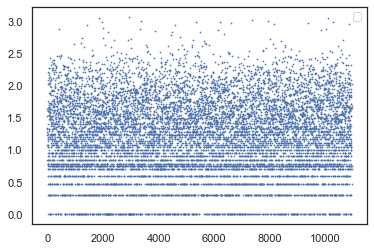

In [791]:
x_ax = range(len(y_test))
#plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
#plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.scatter(x_ax,y_test, s=0.5)
plt.legend()
plt.show()

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.